In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write
from scipy.io.wavfile import read
from scipy import signal
from scipy.fft import fft, ifft, fftfreq

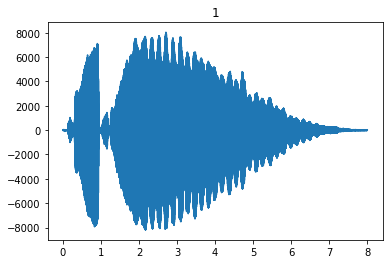

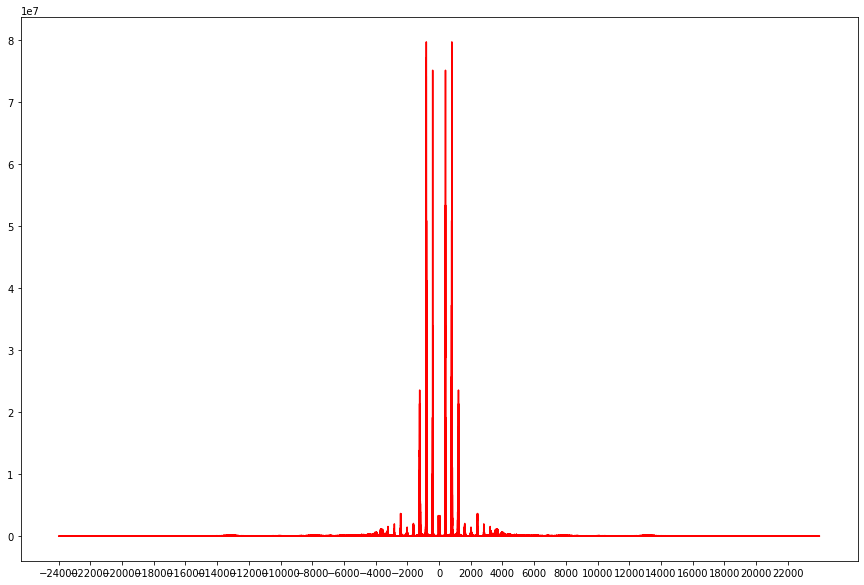

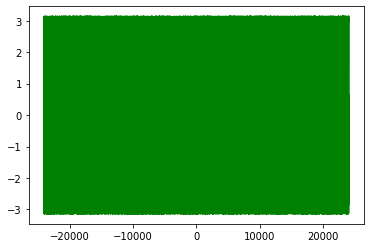

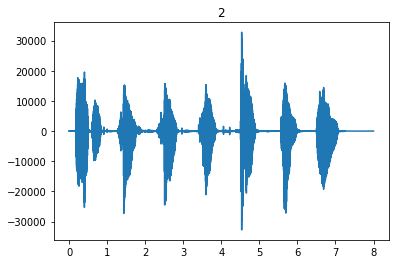

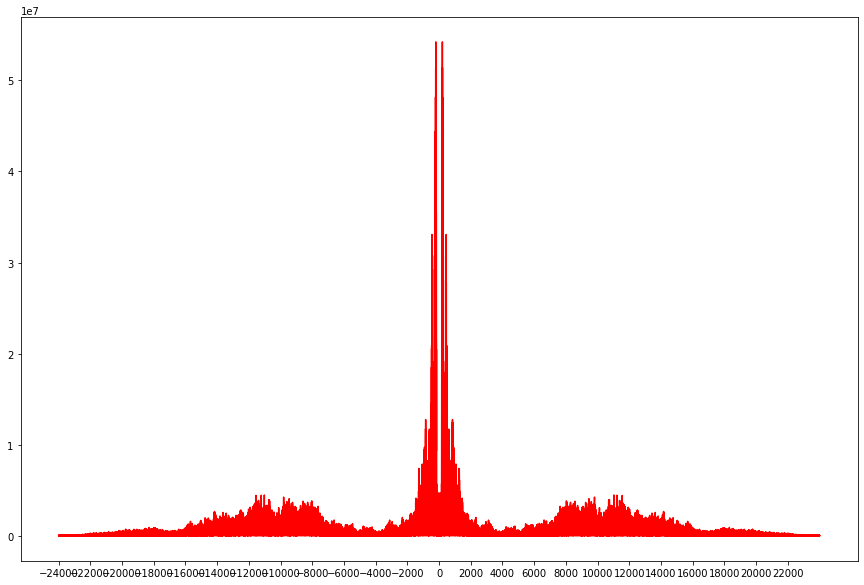

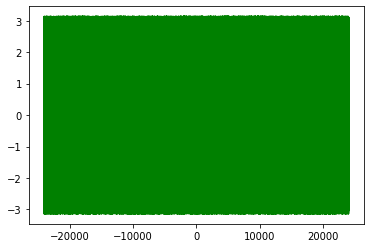

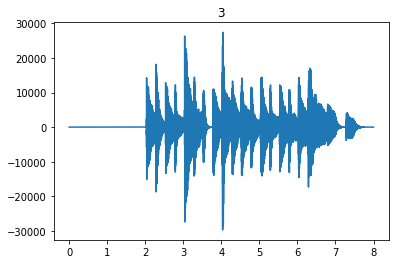

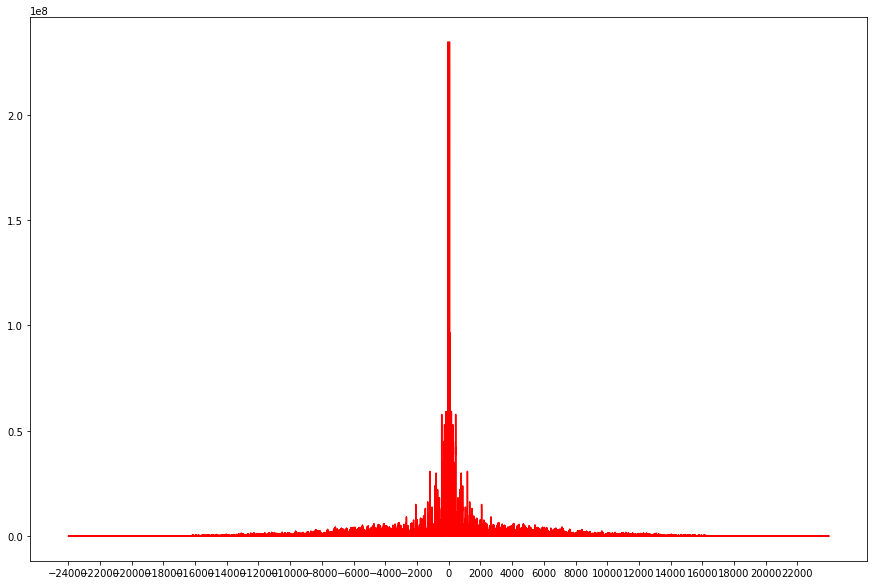

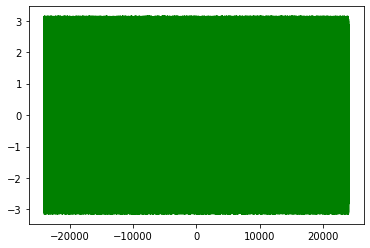

In [ ]:
def f(b, fs, N):
  b[0] = 0
  c = fft(b) # create a list of complex number
  e = fftfreq(N, 1/fs)
  d = len(c)//2  # you only need half of the fft list
  plt.figure(figsize=(15, 10))
  plt.xticks(range(-24000, 24000, 2000))
  plt.plot(e,np.abs(c),'r')
  plt.show()

  plt.plot(e, np.angle(c),'g')
  plt.show()

# #T = max of length of signals/Fs
# Fs = 22050
# T = 1
# t = np.arange(Fs*T)
# N = T*Fs
Fs, S1 = read('ciccio.wav','r')
# S1 = np.sin((100*2*np.pi*t)/Fs)
# write("signal1.wav", Fs, np.int16( S1*32767//2))

Fs, S2 = read('countdown.wav','r')
# S2 = np.cos((300*2*np.pi*t)/Fs)
# write("signal2.wav", Fs, np.int16(S2*32767//2))

Fs, S3 = read('vignettes.wav','r')
# S3 = np.cos((1000*2*np.pi*t)/Fs)
# write("signal3.wav", Fs, np.int16(S3*32767//2))

t = np.arange(len(S1))
T = len(S1)//Fs
N = len(S1)

##paddng S2

S2 = np.append(S2, np.zeros(len(S1)-len(S2)))

plt.title("1")
plt.plot(t/Fs, S1)
plt.show()
f(S1, Fs, N)
plt.plot(t/Fs, S2)
plt.title("2")
plt.show()
f(S2, Fs, N)
plt.plot(t/Fs, S3)
plt.title("3")
plt.show()
f(S3, Fs, N)

Band limiting the inputs

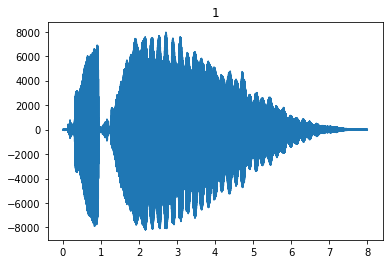

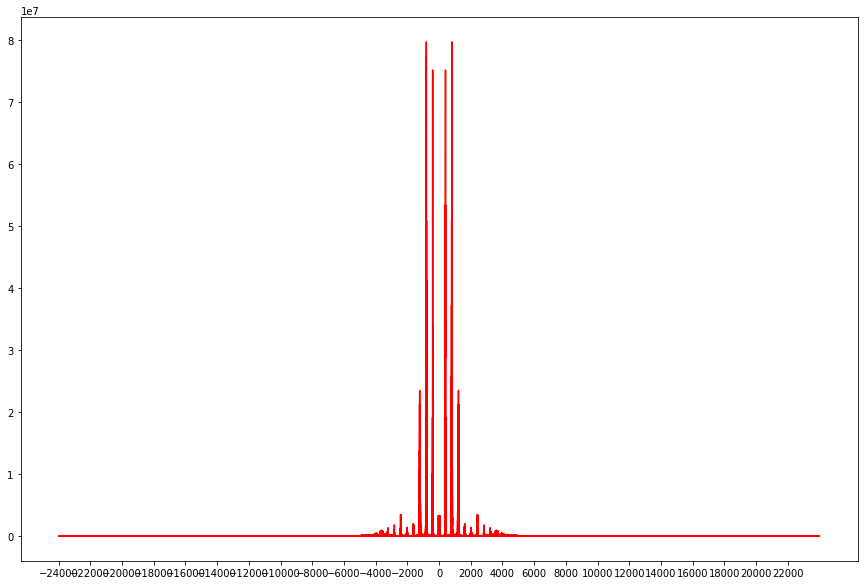

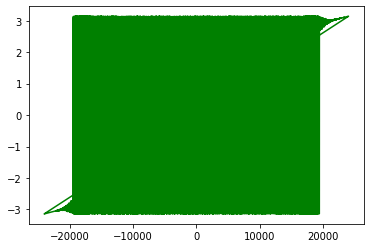

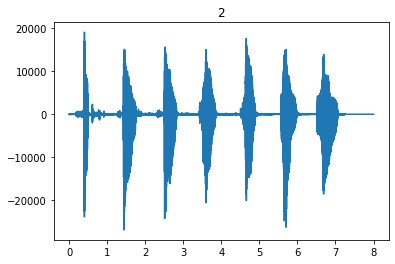

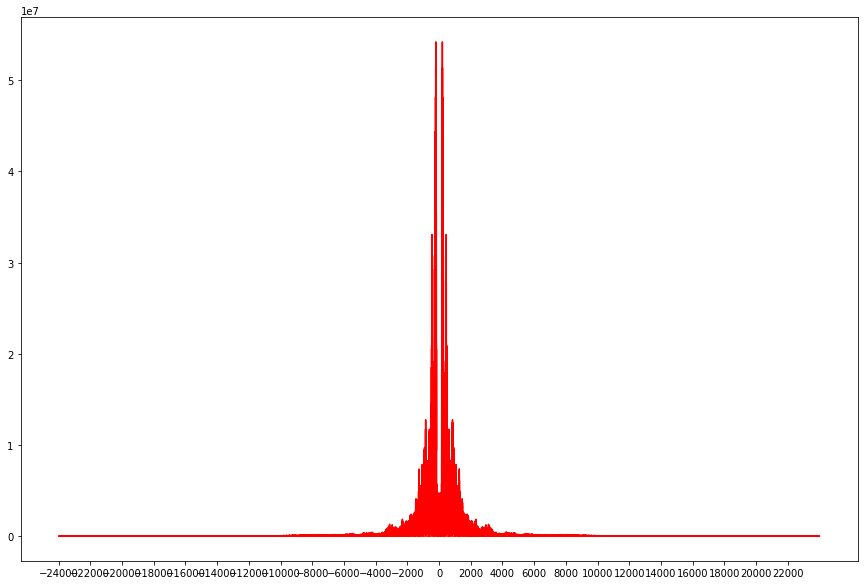

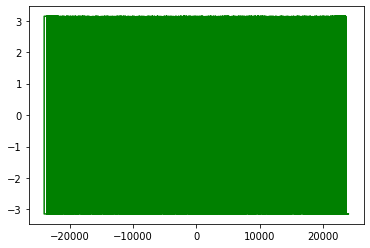

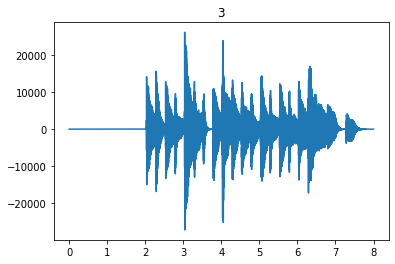

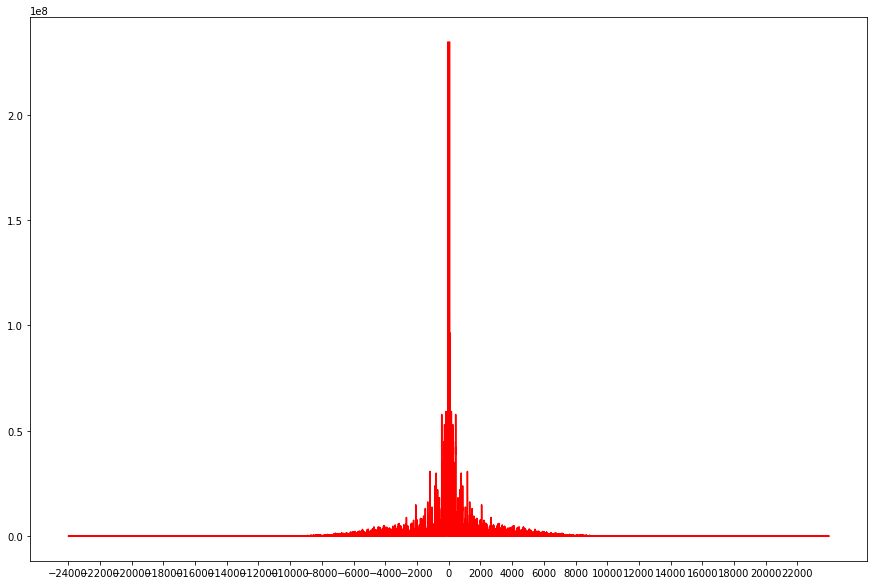

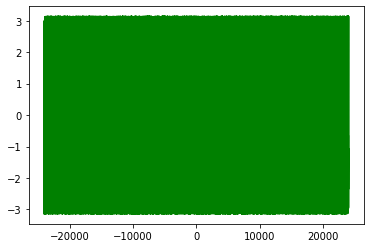

In [ ]:
from scipy.signal import butter, filtfilt
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y
#filter requirements 1
nyq = 0.5*Fs
order = 2
cutoff = 5000
S1_bl = butter_lowpass_filter(S1, cutoff, Fs, order)

#filter requirements 2
nyq = 0.5*Fs
order = 2
cutoff = 4000
S2_bl = butter_lowpass_filter(S2, cutoff, Fs, order)

#filter requirements 3
nyq = 0.5*Fs
order = 2
cutoff = 6000
S3_bl = butter_lowpass_filter(S3, cutoff, Fs, order)

plt.plot(t/Fs, S1_bl)
plt.title("1")
plt.show()
f(S1_bl, Fs, N)
plt.plot(t/Fs, S2_bl)
plt.title("2")
plt.show()
f(S2_bl, Fs, N)
plt.plot(t/Fs, S3_bl)
plt.title("3")
plt.show()
f(S3_bl, Fs, N)

Frequency Modulation

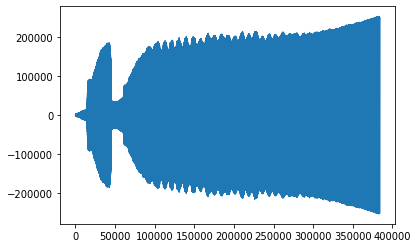

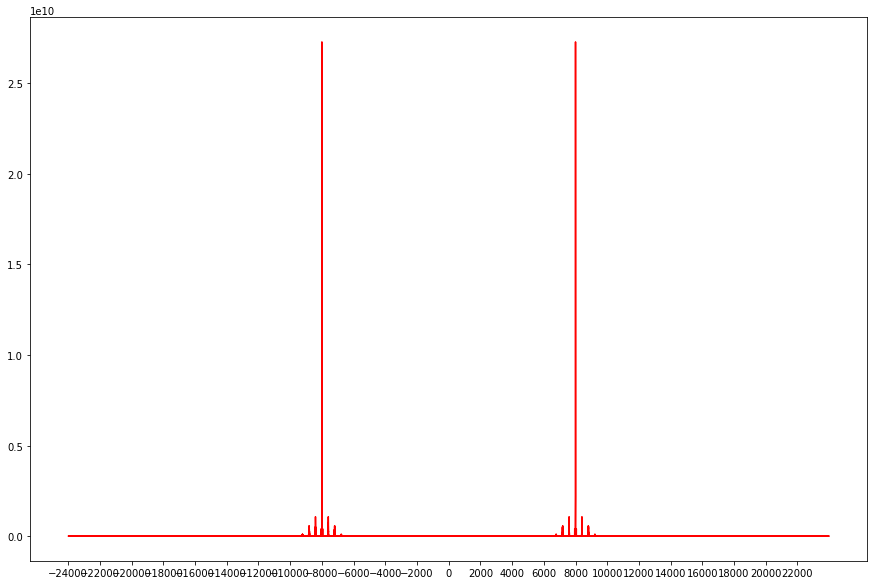

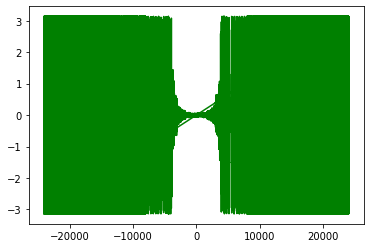

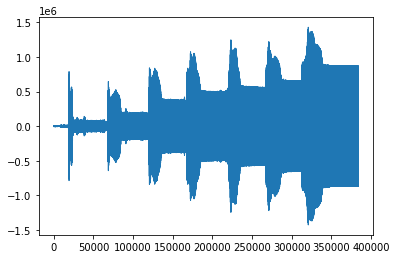

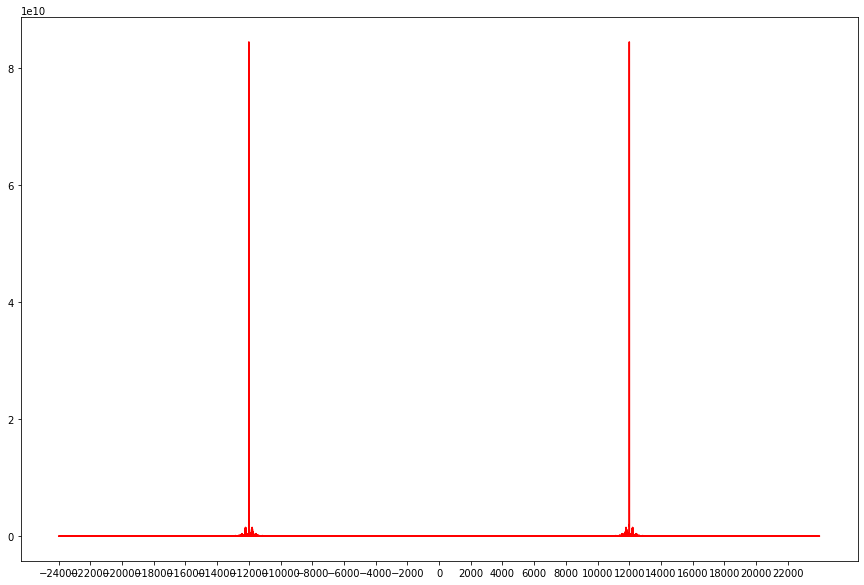

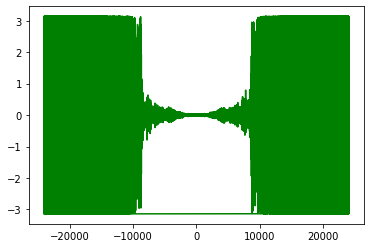

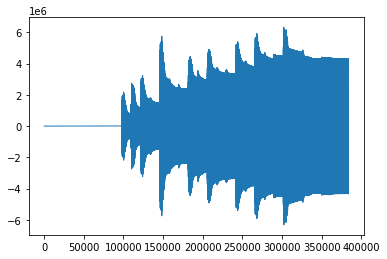

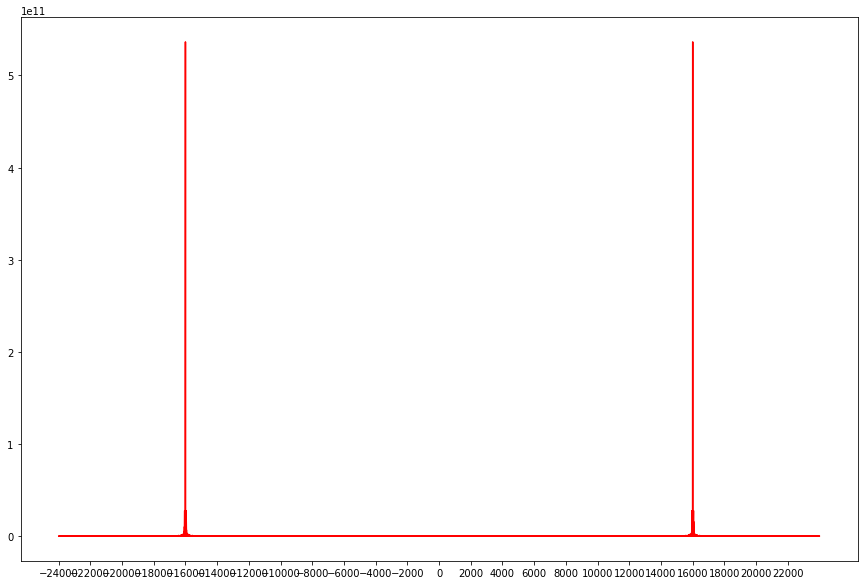

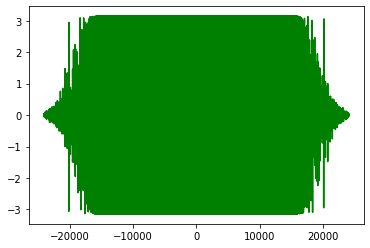

In [ ]:
K = 5 #deviation constant
f_carrier1 = 8000
f_carrier2 = 12000
f_carrier3 = 16000

def f1(b, fs, N):
  b[0] = 0
  c = fft(b) # create a list of complex number
  e = fftfreq(N, 1/fs)
  d = len(c)//2  # you only need half of the fft list

  plt.plot(e[:1000],np.abs(c)[:1000],'r')
  plt.show()

  plt.plot(e[:1000], np.angle(c)[:1000],'g')
  plt.show()


carrier = 2*np.pi*f_carrier1*(t/Fs)
modulator = K*np.cumsum(S1_bl)
# waveform1 = np.cos(carrier+modulator)
waveform1 = np.sin(carrier) * modulator
waveform1 *= 0.3
plt.plot(t, waveform1, scalex=True, linewidth = 1)
plt.show()
waveform1_ints = np.int16(waveform1*32767//2)
write('fm-1.wav', Fs,waveform1_ints)
f(waveform1, Fs, N)
# f1(waveform1, Fs, N)

t = np.arange(Fs*T)
carrier = 2*np.pi*f_carrier2*(t/Fs)
modulator = K*np.cumsum(S2_bl)
# waveform2 = np.cos(carrier+modulator)
waveform2 = np.sin(carrier) * modulator
waveform2 *= 0.3
plt.plot(t, waveform2, scalex=True, linewidth=1)
plt.show()
waveform2_ints = np.int16(waveform2*32767//2)
write('fm-2.wav', Fs,waveform2_ints)
f(waveform2, Fs, N)

t = np.arange(Fs*T)
carrier = 2*np.pi*f_carrier3*(t/Fs)
modulator = K*np.cumsum(S3_bl)
# waveform3 = np.cos(carrier+modulator)
waveform3 = np.sin(carrier)*modulator
waveform3 *= 0.3
plt.plot(t, waveform3, scalex=True, linewidth=1)
plt.show()
waveform3_ints = np.int16(waveform3*32767//2)
write('fm-3.wav', Fs,waveform3_ints)
f(waveform3, Fs, N)
# f1(waveform3, Fs, N)


Merging the Three waveforms

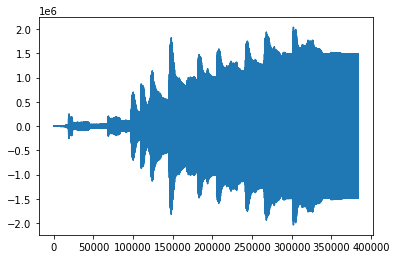

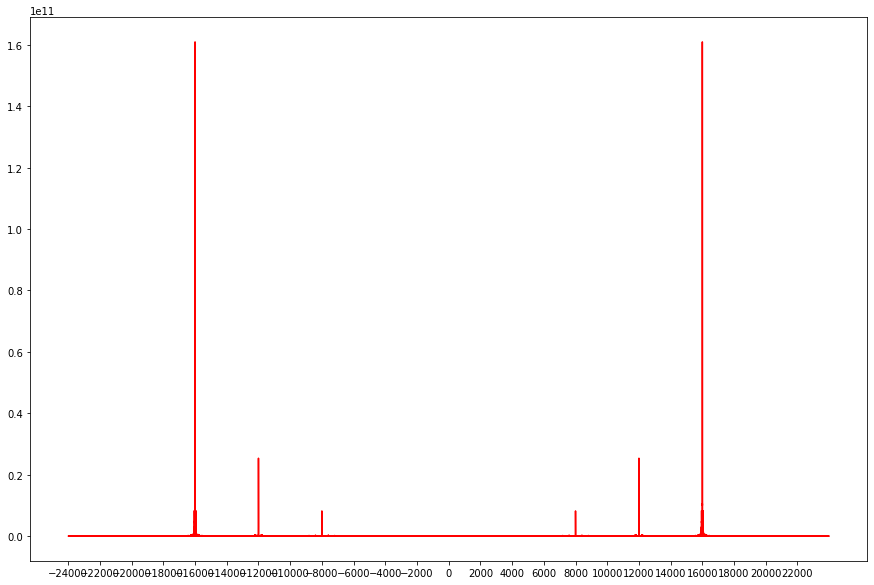

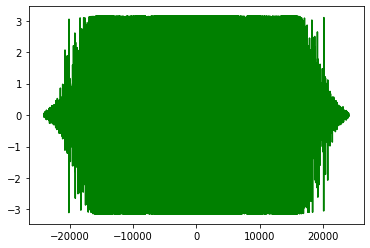

In [ ]:
M = waveform1 + waveform2 + waveform3
M *= 0.3
plt.plot(t, M)
plt.show()
write("merged.wav", Fs, np.int16(M*32767//2))
f(M, Fs, N)

Separating the three waveforms

In [ ]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    return butter(order, [lowcut, highcut], fs=fs, btype='band')

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


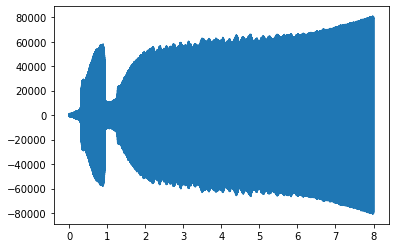

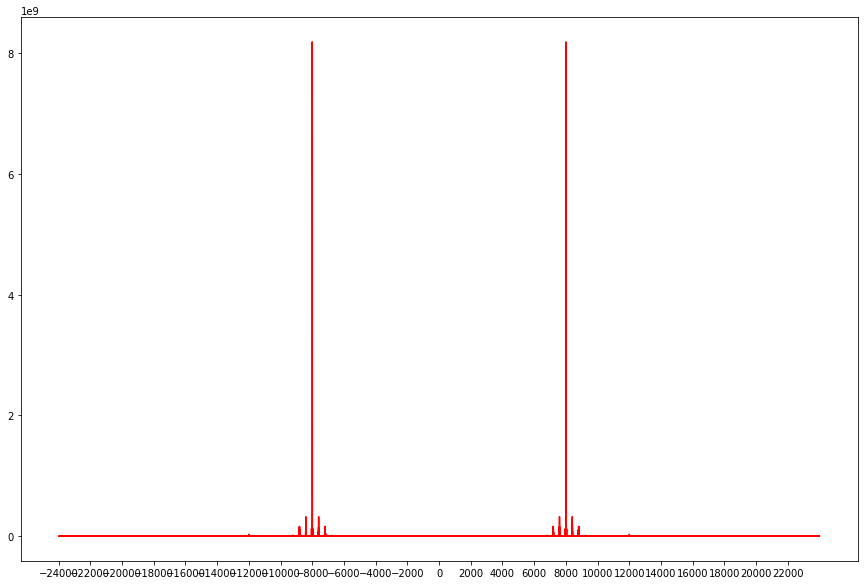

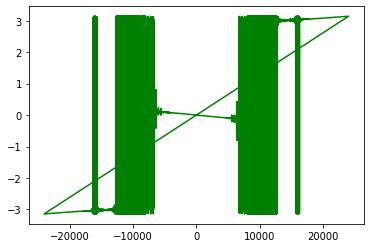

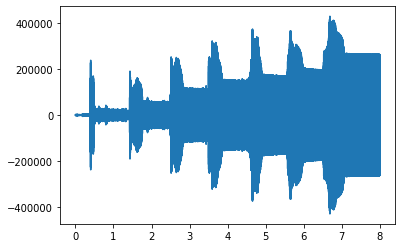

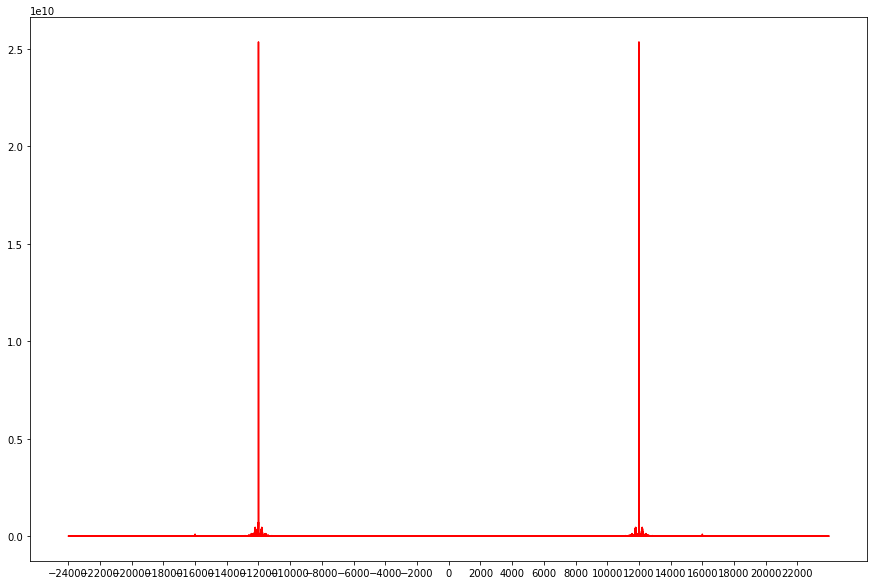

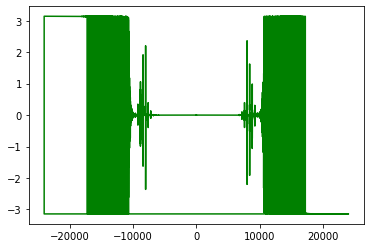

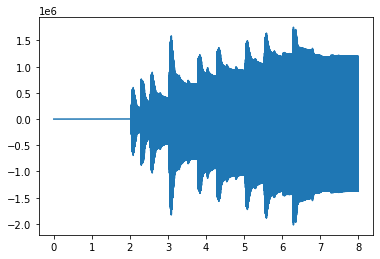

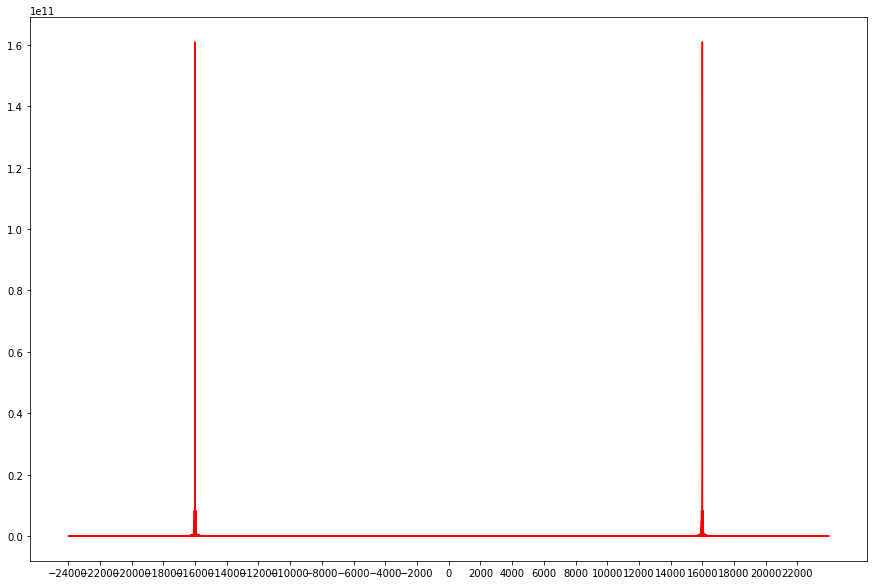

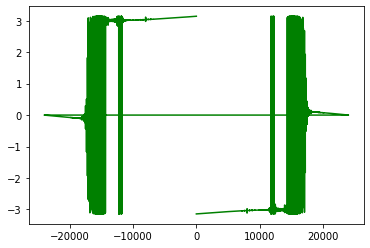

In [ ]:
#For waveform 1
lowcut = 7000
highcut = 9000
fs =Fs
W1 = butter_bandpass_filter(M, lowcut, highcut, fs)
write("wave1out.wav", fs, np.int16(W1*32767//2))
plt.plot(t/Fs, W1)
plt.show()
f(W1, Fs, N)

#For waveform 2
lowcut = 11000
highcut = 13000
W2 = butter_bandpass_filter(M, lowcut, highcut, fs)
write("wave2out.wav", fs, np.int16(W2*32767//2))
plt.plot(t/Fs, W2)
plt.show()
f(W2, Fs, N)

#For waveform 1
lowcut = 15000
highcut = 17000
W3 = butter_bandpass_filter(M, lowcut, highcut, fs)
write("wave3out.wav", fs, np.int16(W3*32767//2))
plt.plot(t/Fs, W3)
plt.show()
f(W3, Fs, N)

In [ ]:
#demodulation
from scipy.signal import butter, filtfilt
#filter requirements
fs = Fs
nyq = 0.5*Fs
order = 2

def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

def fm_demod(x, cutoff, Fs, Order):
  k1=0
  k2=1
  # phi = np.diff(x) ## AM modulated
  # phi[0] = 0
  # y = butter_lowpass_filter(phi, cutoff, Fs, Order)
  y = butter_lowpass_filter(k1*x+k2*x*x, cutoff, Fs, Order)
  return y

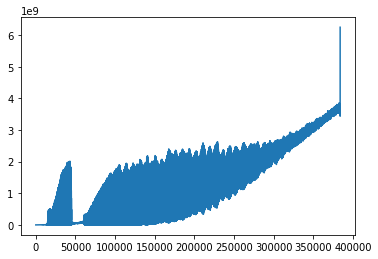

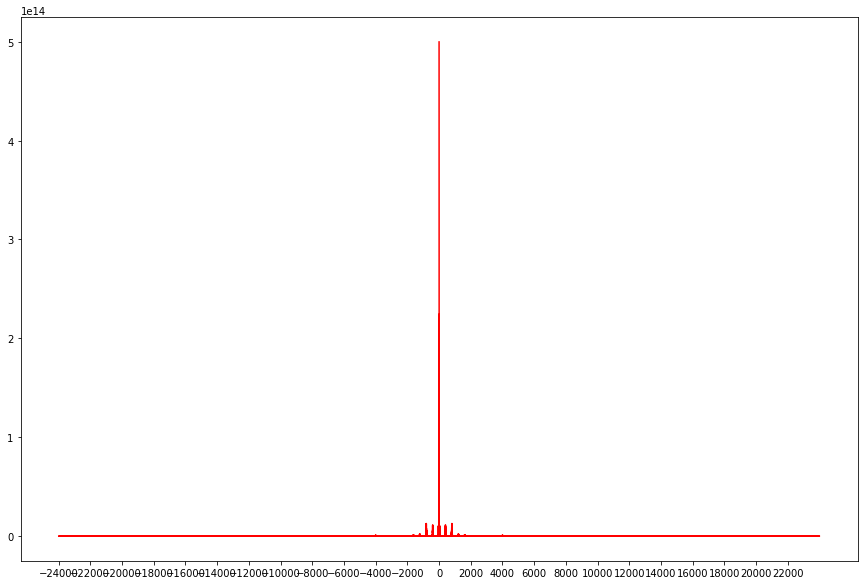

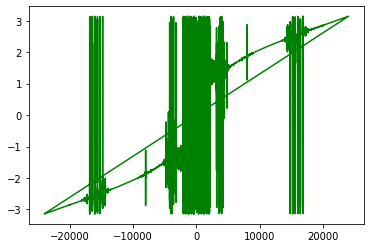

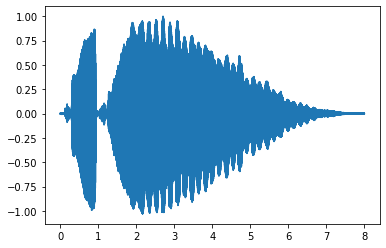

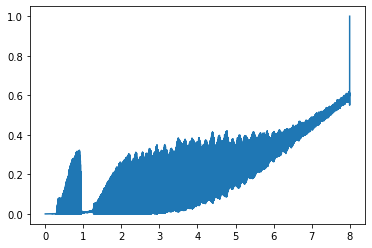

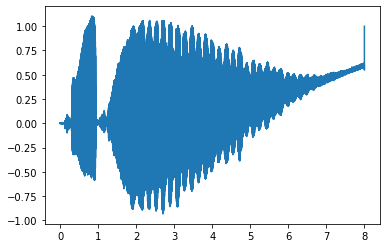

In [ ]:
k1 = 1.0
k2 = 1.0
cutoff = 5000
Out = k1 * W1 + k2 * W1 * W1
Out = butter_lowpass_filter(Out, cutoff, Fs, order)
plt.plot(t, Out)
plt.show()
f(Out, Fs, N)
Out_ints = np.int16(Out*32767//2)
write('out_simple-sine.wav', Fs, Out_ints)

plt.plot(t/Fs, (S1_bl/max(S1_bl)))
plt.show()
plt.plot(t/Fs, (Out/max(Out)))
plt.show()
plt.plot(t/Fs, (Out/max(Out))-(S1_bl/max(S1_bl)))
plt.show()

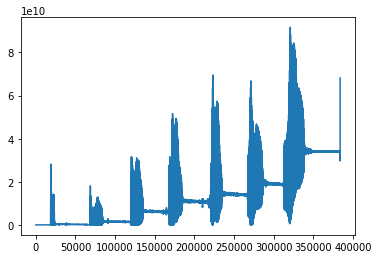

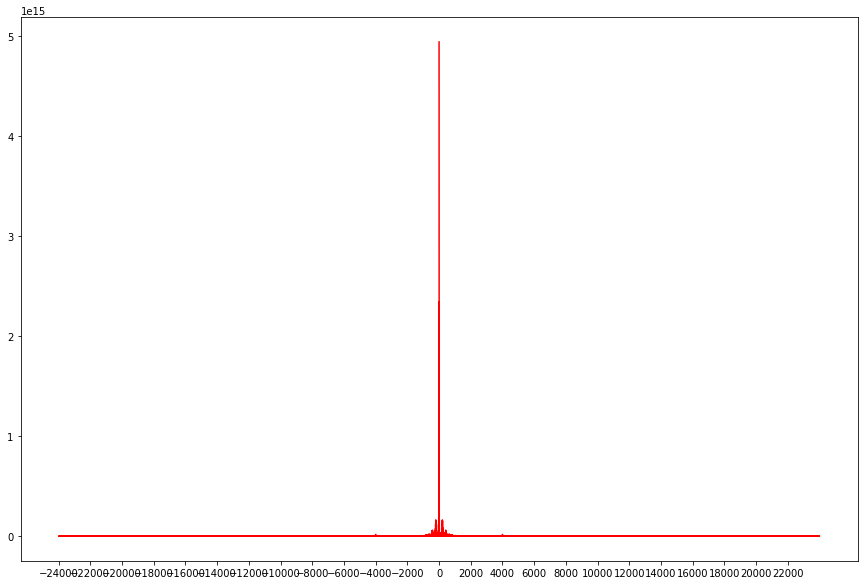

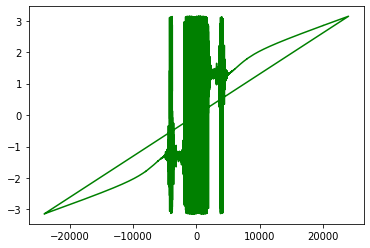

In [ ]:
k1 = 0.0
k2 = 1.0
cutoff = 6000
Out = k1 * W2 + k2 * W2 * W2
Out = butter_lowpass_filter(Out, cutoff, Fs, order)
plt.plot(t, Out)
plt.show()
f(Out, Fs, N)
Out_ints = np.int16(Out*32767//2)
write('out_simple-sine2.wav', Fs, Out_ints)

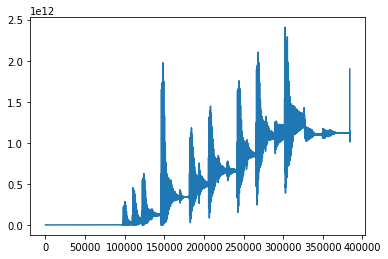

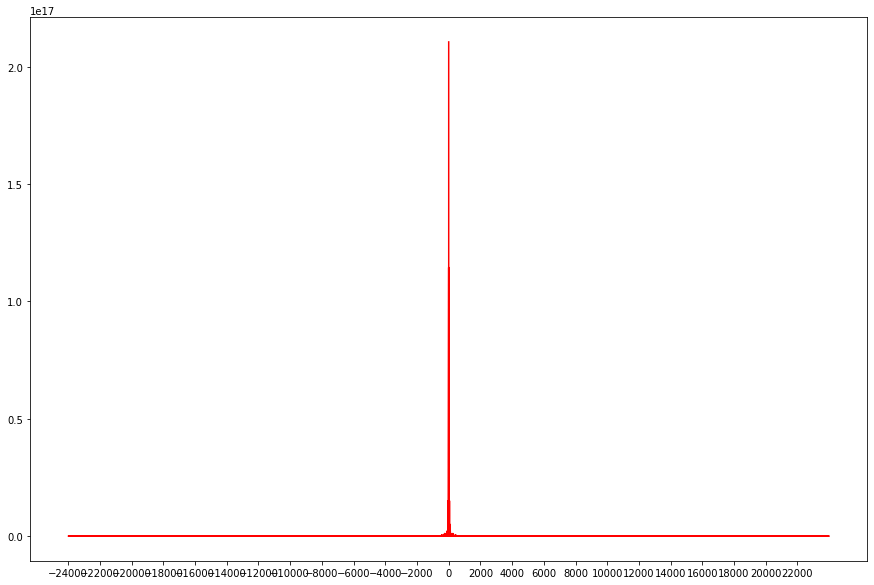

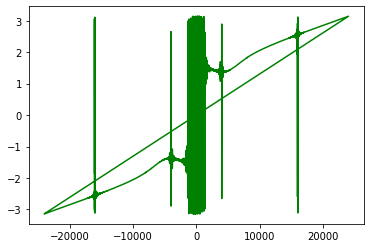

In [ ]:
k1 = 0.0
k2 = 1.0
cutoff = 6000
Out = k1 * W3 + k2 * W3 * W3
Out = butter_lowpass_filter(Out, cutoff, Fs, order)
plt.plot(t, Out)
plt.show()
f(Out, Fs, N)
Out_ints = np.int16(Out*32767//2)
write('out_simple-sine3.wav', Fs, Out_ints)

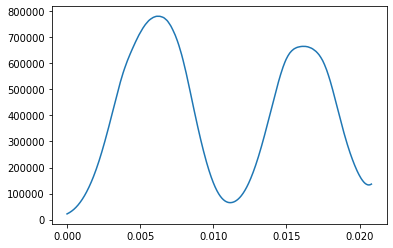

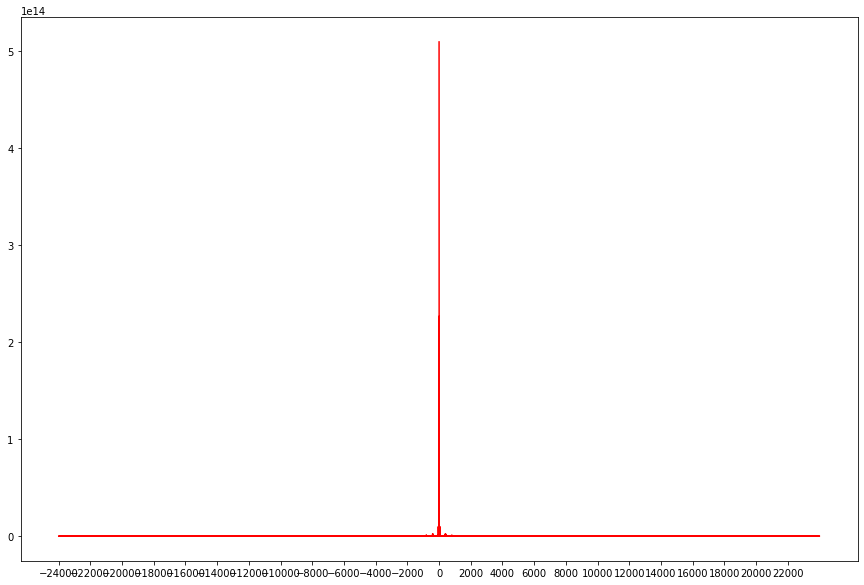

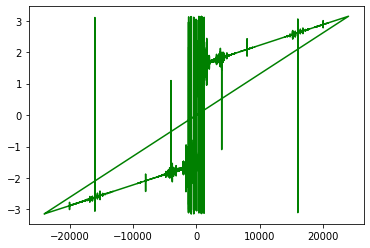

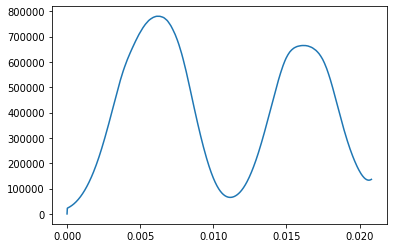

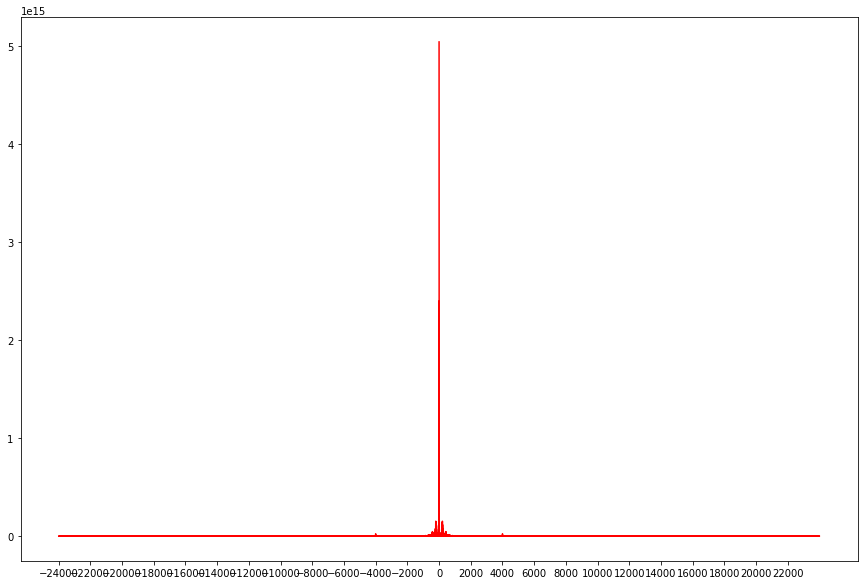

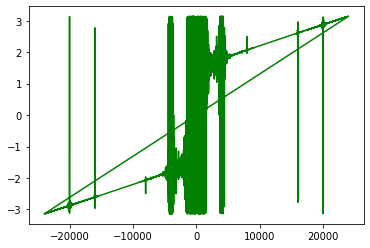

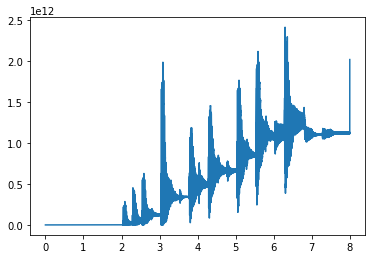

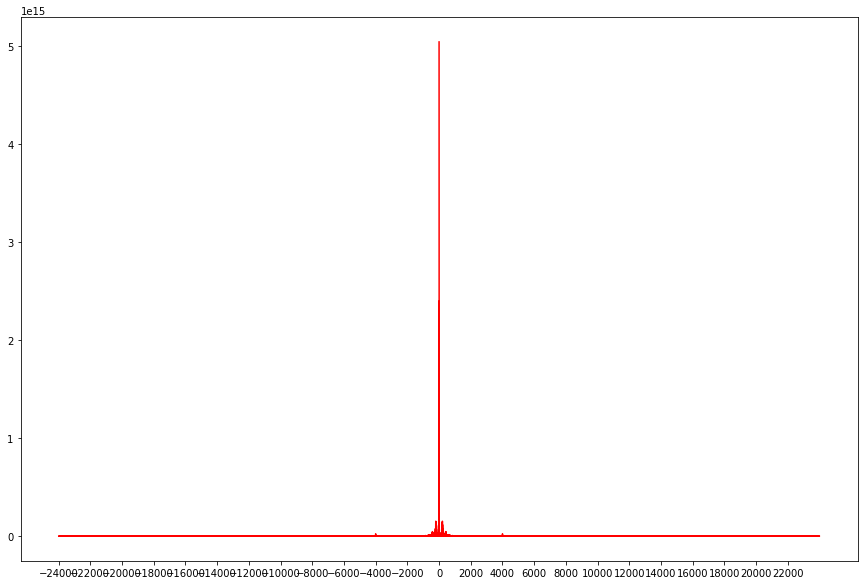

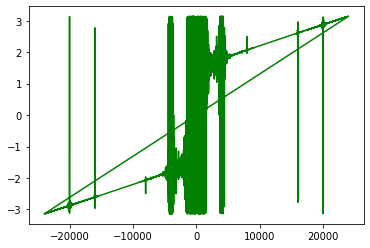

In [ ]:
Y1 = fm_demod(W1, 200, Fs, 1)
Y1 = np.append(Y1, np.array(0))
plt.plot(t[:1000]/Fs,Y1[:1000])
plt.show()
f(Y1[:-1], Fs, N)

Y2 = fm_demod(W2, 800, Fs, 1)
Y2 = np.append(Y2, np.array(0))
plt.plot(t[:1000]/Fs,Y1[:1000])
plt.show()
f(Y2[:-1], Fs, N)

Y3 = fm_demod(W3, 2000, Fs, 1)
Y3 = np.append(Y3, np.array(0))
plt.plot(t/Fs,Y3[:-1])
plt.show()
f(Y2[:-1], Fs, N)

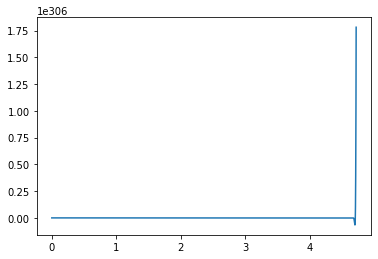

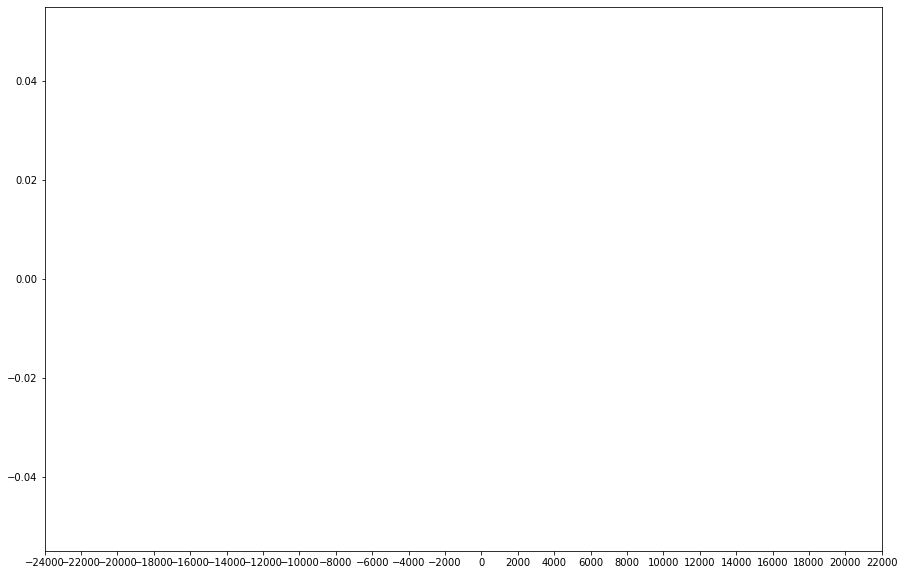

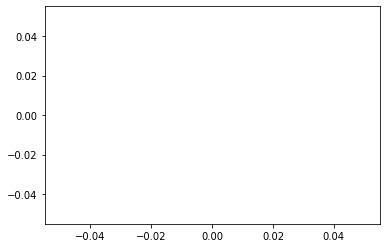